<a href="https://colab.research.google.com/github/bhagich/ML/blob/main/Boston_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving 02_Boston_Regression.csv to 02_Boston_Regression.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
boston = pd.read_csv('02_Boston_Regression.csv')

In [6]:
boston.head()

,CITYID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
boston.columns

Index(['CITYID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
boston.shape

(506, 15)

In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CITYID   506 non-null    int64  
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    float64
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    float64
 11  PTRATIO  452 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
 14  MEDV     506 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 59.4 KB


In [11]:
boston.describe()

,CITYID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000,506.000000,506.000000,506.000000
mean,253.500000,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,18.247124,356.674032,12.653063,22.532806
std,146.213884,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,2.200064,91.294864,7.141062,9.197104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,16.800000,375.377500,6.950000,17.025000
50%,253.500000,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.600000,391.440000,11.360000,21.200000
75%,379.750000,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
np.all(np.isfinite(boston['CRIM']))

True

In [28]:
np.all(np.isfinite(boston['ZN'])) # 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'

True

In [40]:
np.all(np.isfinite(boston['LSTAT']))

True

In [38]:
np.all(np.isfinite(boston['B']))

True

In [46]:
np.all(np.isfinite(boston['PTRATIO']))

False

In [48]:
boston['PTRATIO'].values

array([15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15.2,
       15.2, 15.2, 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. ,
       21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. ,
       21. , 21. , 19.2, 19.2, 19.2, 19.2, 18.3, 18.3, 17.9, 17.9, 17.9,
       17.9, 17.9, 17.9, 17.9, 17.9, 17.9, 16.8, 16.8, 16.8, 16.8, 21.1,
       17.9, 17.3, 15.1, 19.7, 19.7, 19.7, 19.7, 19.7, 19.7, 18.6, 16.1,
       16.1, 18.9, 18.9, 18.9, 19.2, 19.2, 19.2, 19.2, 18.7, 18.7, 18.7,
       18.7, 18.7, 18.7, 19. , 19. , 19. , 19. , 18.5, 18.5, 18.5, 18.5,
       17.8, 17.8, 17.8, 17.8, 18.2, 18.2, 18.2, 18. , 18. , 18. , 18. ,
       18. , 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9,
       20.9, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 19.1,
       19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 21.2, 21.2, 21.2, 21.2, 21.2,
       21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 14.7,
       14.7, 14.7, 14.7, 14.7, 14.7, 14.7, 14.7, 14

In [50]:
boston['PTRATIO']=boston['PTRATIO'].replace(np.nan,0)

In [51]:
boston['PTRATIO'].values

array([15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15.2,
       15.2, 15.2, 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. ,
       21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. ,
       21. , 21. , 19.2, 19.2, 19.2, 19.2, 18.3, 18.3, 17.9, 17.9, 17.9,
       17.9, 17.9, 17.9, 17.9, 17.9, 17.9, 16.8, 16.8, 16.8, 16.8, 21.1,
       17.9, 17.3, 15.1, 19.7, 19.7, 19.7, 19.7, 19.7, 19.7, 18.6, 16.1,
       16.1, 18.9, 18.9, 18.9, 19.2, 19.2, 19.2, 19.2, 18.7, 18.7, 18.7,
       18.7, 18.7, 18.7, 19. , 19. , 19. , 19. , 18.5, 18.5, 18.5, 18.5,
       17.8, 17.8, 17.8, 17.8, 18.2, 18.2, 18.2, 18. , 18. , 18. , 18. ,
       18. , 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9,
       20.9, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 19.1,
       19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 21.2, 21.2, 21.2, 21.2, 21.2,
       21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 14.7,
       14.7, 14.7, 14.7, 14.7, 14.7, 14.7, 14.7, 14

In [52]:
X = boston.drop(['MEDV','CITYID'],axis=1) 
y = boston['MEDV']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [56]:
print(reg.coef_)

[ 9.98646663e-02  6.58363675e-02 -1.45517585e-01  3.05978455e+00
 -4.21742773e+00  1.30059210e-01  9.13473776e-03 -1.49497679e+00
  2.50538527e-02 -5.22407126e-03 -9.52140320e-01  3.02400620e-03
 -8.21941920e-01]


In [57]:
print(reg.intercept_)

58.44227204033117


In [59]:
y_pred = reg.predict(X_test) 

In [62]:
from sklearn.metrics import r2_score
test_err=r2_score(y_test,y_pred)
test_err

0.46623147830175504

In [64]:
#predicting on training data
y_pred_train = reg.predict(X_train)
train_err=r2_score(y_pred_train,y_train)
train_err

0.6212783923161685

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


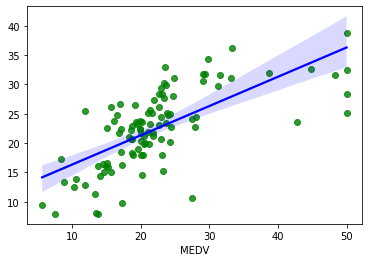

In [66]:
import seaborn as sns
sns.regplot(y_test, y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) ;